In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("emissions.csv")
df2 = df[["project_name", "cpu_energy", "ram_energy"]]

In [3]:
df2 = df2.set_index("project_name")

Text(0.5, 0, '')

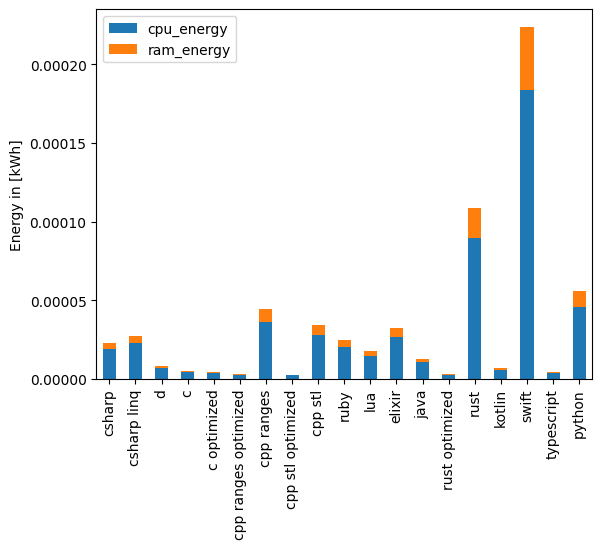

In [4]:
ax = df2.plot.bar(stacked=True)
plt.ylabel("Energy in [kWh]")
plt.xlabel("")
#ax.bar_label(ax.containers[0])

In [5]:
df2

,cpu_energy,ram_energy
project_name,,
csharp,0.000019,4.127192e-06
csharp linq,0.000022,4.919935e-06
d,0.000007,1.430370e-06
c,0.000004,8.849560e-07
c optimized,0.000004,7.911773e-07
cpp ranges optimized,0.000002,5.293714e-07
cpp ranges,0.000036,7.952882e-06
cpp stl optimized,0.000002,4.660000e-07
cpp stl,0.000028,6.163543e-06


In [6]:
df2["total_energy"] = df2.cpu_energy + df2.ram_energy

In [7]:
df2

,cpu_energy,ram_energy,total_energy
project_name,,,
csharp,0.000019,4.127192e-06,0.000023
csharp linq,0.000022,4.919935e-06,0.000027
d,0.000007,1.430370e-06,0.000008
c,0.000004,8.849560e-07,0.000005
c optimized,0.000004,7.911773e-07,0.000004
cpp ranges optimized,0.000002,5.293714e-07,0.000003
cpp ranges,0.000036,7.952882e-06,0.000044
cpp stl optimized,0.000002,4.660000e-07,0.000003
cpp stl,0.000028,6.163543e-06,0.000034


In [8]:
df2.sort_values("total_energy", ascending=False)

,cpu_energy,ram_energy,total_energy
project_name,,,
swift,0.000184,4.036288e-05,0.000224
rust,0.000089,1.960730e-05,0.000109
python,0.000046,1.006932e-05,0.000056
cpp ranges,0.000036,7.952882e-06,0.000044
cpp stl,0.000028,6.163543e-06,0.000034
elixir,0.000027,5.863723e-06,0.000033
csharp linq,0.000022,4.919935e-06,0.000027
ruby,0.000020,4.454521e-06,0.000025
csharp,0.000019,4.127192e-06,0.000023


In [9]:
min_val = df2.total_energy.min()
df2["normed_total_energy"] = df2.total_energy / min_val

In [10]:
df2

,cpu_energy,ram_energy,total_energy,normed_total_energy
project_name,,,,
csharp,0.000019,4.127192e-06,0.000023,8.844014
csharp linq,0.000022,4.919935e-06,0.000027,10.542536
d,0.000007,1.430370e-06,0.000008,3.066318
c,0.000004,8.849560e-07,0.000005,1.897429
c optimized,0.000004,7.911773e-07,0.000004,1.696620
cpp ranges optimized,0.000002,5.293714e-07,0.000003,1.135100
cpp ranges,0.000036,7.952882e-06,0.000044,17.040916
cpp stl optimized,0.000002,4.660000e-07,0.000003,1.000000
cpp stl,0.000028,6.163543e-06,0.000034,13.207233


In [11]:
df3 = df2[["normed_total_energy"]]

In [12]:
df3

,normed_total_energy
project_name,
csharp,8.844014
csharp linq,10.542536
d,3.066318
c,1.897429
c optimized,1.696620
cpp ranges optimized,1.135100
cpp ranges,17.040916
cpp stl optimized,1.000000
cpp stl,13.207233


Text(0.5, 0, '')

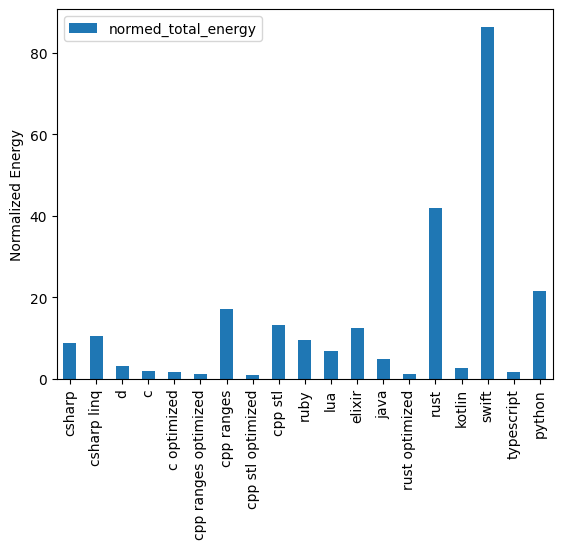

In [13]:
df3.plot.bar(stacked=True)
plt.ylabel("Normalized Energy")
plt.xlabel("")